# EDA and Data Cleaning for Uber Eats

This notebook contains a first look at the Ubereats tweets, EDA, and Data Cleaning. 

In [1]:
import pandas as pd
import numpy as np

In [18]:
# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import seaborn as sns

In [2]:
pd.options.display.max_columns = 45 # To see all columns

### If you get your csv file, SKIP THIS PART! Jump into Getting Data Part! 

The data was collected from Twitter by using Twint contains tweets from different languages. To load and use the data easier, I choose only English tweets and I wrote it to CSV. I will use this CSV after here. 

In [2]:
# df = pd.read_json('ubereats_data.json', lines=True) # getting json file which contains all language tweets

In [3]:
# df.shape 

(497972, 36)

In [4]:
# df['language'].unique()

array(['en', 'ja', 'es', 'pt', 'fr', 'ca', 'und', 'is', 'in', 'zh', 'pl',
       'tl', 'vi', 'nl', 'lt', 'it', 'fa', 'de', 'sv', 'et', 'th', 'ar',
       'tr', 'da', 'ru', 'ht', 'no', 'hi', 'fi', 'el', 'eu', 'cs', 'sl',
       'ko', 'cy', 'lv', 'hu', 'ro', 'si', 'uk', 'iw', 'ne', 'ta', 'sr'],
      dtype=object)

In [5]:
# df_en = df.loc[df['language']=='en'] # choose only English tweets

In [7]:
# df_en.shape # check the number of tweets

(175016, 36)

In [11]:
# df_en.to_csv('uber_eats_from_2020-11-17_to_2021-01-15.csv',index=False) # keep tweets in csv - only English

## Getting Data

In [3]:
df = pd.read_csv('uber_eats_from_2020-11-17_to_2021-01-15.csv')

## First Look to Columns

In [6]:
df.head(5).append(df.tail(5)) #check the first and last 5 rows to see date difference


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1350276200262938626,1350204377403858944,2021-01-15 20:58:27-06:00,2021-01-15,20:58:27,-600,1184177252843409408,mamad87369917,Mama D #resist 🌈,NaN,@brianschatz I gave no tours of the Capitol b...,en,[],[],[],0,0,0,[],[],https://twitter.com/mamad87369917/status/13502...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'brianschatz', 'name': 'Brian...",NaN,NaN,NaN,NaN
1,1350276193761820673,1350276193761820672,2021-01-15 20:58:26-06:00,2021-01-15,20:58:26,-600,1133148206211227649,noahwhi81483505,Noah White,NaN,eats-9sy4zs 10 pound off 15 pound spend code ...,en,[],[],[],0,0,0,"['ubereatspromocode', 'ubereats', 'ubereatscod...",[],https://twitter.com/NoahWhi81483505/status/135...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1350276072559022080,1350198825479249920,2021-01-15 20:57:57-06:00,2021-01-15,20:57:57,-600,2815754953,uber_support,Uber Support,NaN,"@nickieohara Hi Nickie, we are happy to help. ...",en,[],['https://ubr.to/2Y3fGaY'],[],0,0,0,[],[],https://twitter.com/Uber_Support/status/135027...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nickieohara', 'name': 'N I C...",NaN,NaN,NaN,NaN
3,1350276002430164992,1350276002430164992,2021-01-15 20:57:40-06:00,2021-01-15,20:57:40,-600,359145006,blacksoul_hippy,LIL BLOODYWVTER,NaN,@DoorDash is the worst app only Uber eats or P...,en,[],[],[],0,0,0,[],[],https://twitter.com/BlackSouL_Hippy/status/135...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1350275745847910400,1350274127865765888,2021-01-15 20:56:39-06:00,2021-01-15,20:56:39,-600,422843814,tyisaac,Ty Isaac,NaN,@ScottyRackss Uber eats saved em today no bs lmao,en,[],[],[],1,0,0,[],[],https://twitter.com/TyIsaac/status/13502757458...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ScottyRackss', 'name': 'Mayb...",NaN,NaN,NaN,NaN
175011,1328790474480562176,1328750340796260352,2020-11-17 14:01:51-06:00,2020-11-17,14:01:51,-600,207351109,ethanwashington,Richard Fisher,NaN,@TSN_Sports Getting the wrong Uber eats order ...,en,[],[],[],0,0,0,[],[],https://twitter.com/ethanwashington/status/132...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TSN_Sports', 'name': 'TSN', ...",NaN,NaN,NaN,NaN
175012,1328790402896367622,1328790402896367616,2020-11-17 14:01:34-06:00,2020-11-17,14:01:34,-600,120280918,oshathai,OSHA THAI,NaN,Don't let the rain get you down 🌧️ We'll bring...,en,[],['http://oshathai.com/order-online'],['https://pbs.twimg.com/media/EnDP1GjWEAEHRhJ....,0,0,0,[],[],https://twitter.com/OSHATHAI/status/1328790402...,False,NaN,1,https://pbs.twimg.com/media/EnDP1GjWEAEHRhJ.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
175013,1328790381891383296,1328740024301613056,2020-11-17 14:01:29-06:00,2020-11-17,14:01:29,-600,1308532410947166214,bnuzoe,Zoe G,NaN,@StNurseProject Uber eats for all my snacking ...,en,[],[],[],1,0,1,[],[],https://twitter.com/BNUZOE/status/132879038189...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'StNurseProject', 'name': 'Th...",NaN,NaN,NaN,NaN
175014,1328790376803672064,1328784815018000384,2020-11-17 14:01:28-06:00,2020-11-17,14:01:28,-600,450084573,lifo_the_party,Scoottie,NaN,@Cubicle_Crusher @UberEats We use @DoorDash an...,en,"[{'screen_name': 'doordash', 'name': 'doordash...",[],[],2,0,2,[],[],https://twitter.com/LIFO_the_party/status/1328...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Cubicle_Crusher', 'name': 'C...",NaN,NaN,NaN,NaN
175015,1328790372735209479,1328769520610271232,2020-11-17 14:01:27-06:00,2020-11-17,14:01:27,-600,1227694757834625031,sobuaya,Somechi Obuaya,NaN,@onyekaobuaya_ I ordered Uber eats today 😅,en,[],[],[],1,0,0,[],[],https://twitter.com/SObuaya/status/13287903727...,False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175016 entries, 0 to 175015
Data columns (total 36 columns):
id                 175016 non-null int64
conversation_id    175016 non-null int64
created_at         175016 non-null object
date               175016 non-null object
time               175016 non-null object
timezone           175016 non-null int64
user_id            175016 non-null int64
username           175016 non-null object
name               174985 non-null object
place              398 non-null object
tweet              175016 non-null object
language           175016 non-null object
mentions           175016 non-null object
urls               175016 non-null object
photos             175016 non-null object
replies_count      175016 non-null int64
retweets_count     175016 non-null int64
likes_count        175016 non-null int64
hashtags           175016 non-null object
cashtags           175016 non-null object
link               175016 non-null object
retweet          

In [9]:
df = df.drop(columns=['near', 'geo','source','user_rt_id','user_rt',
                      'retweet_id','retweet_date','translate','trans_src','trans_dest'])

### 1. Deep Into Tweet  Date & Time

In [14]:
df['date_dt']=pd.to_datetime(df['date'])

In [15]:
df['day_of_week'] = df['date_dt'].dt.day_name()

In [17]:
df['day_of_week'].value_counts()

Wednesday    28311
Friday       26713
Tuesday      26103
Thursday     25758
Saturday     23132
Monday       22885
Sunday       22114
Name: day_of_week, dtype: int64

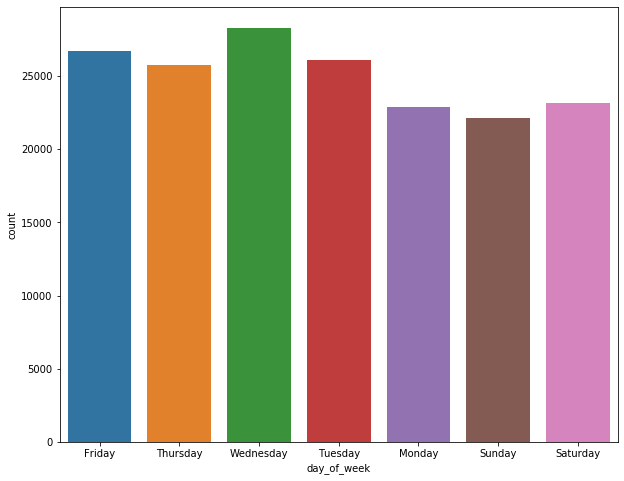

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='day_of_week', data=df)

I expected more tweets at weekends, so I will check date vs day of the week. Maybe, my data contains more weekdays. 

In [203]:
# This function counts how many days there are in df
def count_days(df):
    days = 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday','Saturday'
    total = 0
    for day in days:
        n=df.loc[df['day_of_week']==day]['date'].nunique()
        print(day,n)
        total=total+n
        
    return total

In [213]:
count_days(df)

Friday 9
Thursday 9
Wednesday 9
Tuesday 9
Monday 8
Sunday 8
Saturday 8


60

In [206]:
df['date'].nunique()

60

In [207]:
# This function is only for personal practice, it is long and unnecessary!!!Pandas' functions did it easily!

def count_days_long_way(df):
    days = 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday','Saturday'
    counter = 0
    for day in days:
        counter = 0
        for i in range(0, len(df['day_of_week'])-1):
            if ((df['date'][i]!=df['date'][i+1]) & (df['day_of_week'][i]==day)):
                counter=counter+1
        print(day,counter)            
    return None
        

In [209]:
count_days_long_way(df) 

Friday 9
Thursday 9
Wednesday 9
Tuesday 8
Monday 8
Sunday 8
Saturday 8


In [214]:
df['time_dt']=pd.to_datetime(df['time'])

In [216]:
df['hour'] = df['time_dt'].dt.hour

In [224]:
def count_hours(df): #to see the equality of hour in data
    total = 0
    for hour in list(range(0,24)):
        n=df.loc[df['hour']==hour]['date'].nunique()
        print(hour,n)
        total=total+n
        
    return total

In [225]:
count_hours(df)

0 59
1 59
2 59
3 59
4 59
5 59
6 59
7 59
8 59
9 59
10 59
11 59
12 59
13 59
14 60
15 60
16 60
17 60
18 60
19 60
20 60
21 59
22 59
23 59


1423

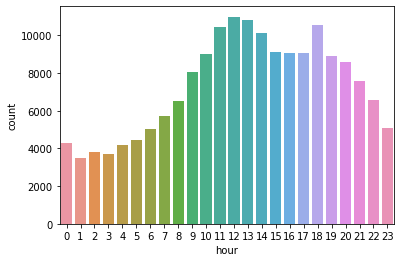

In [226]:
ax = sns.countplot(x='hour', data=df)

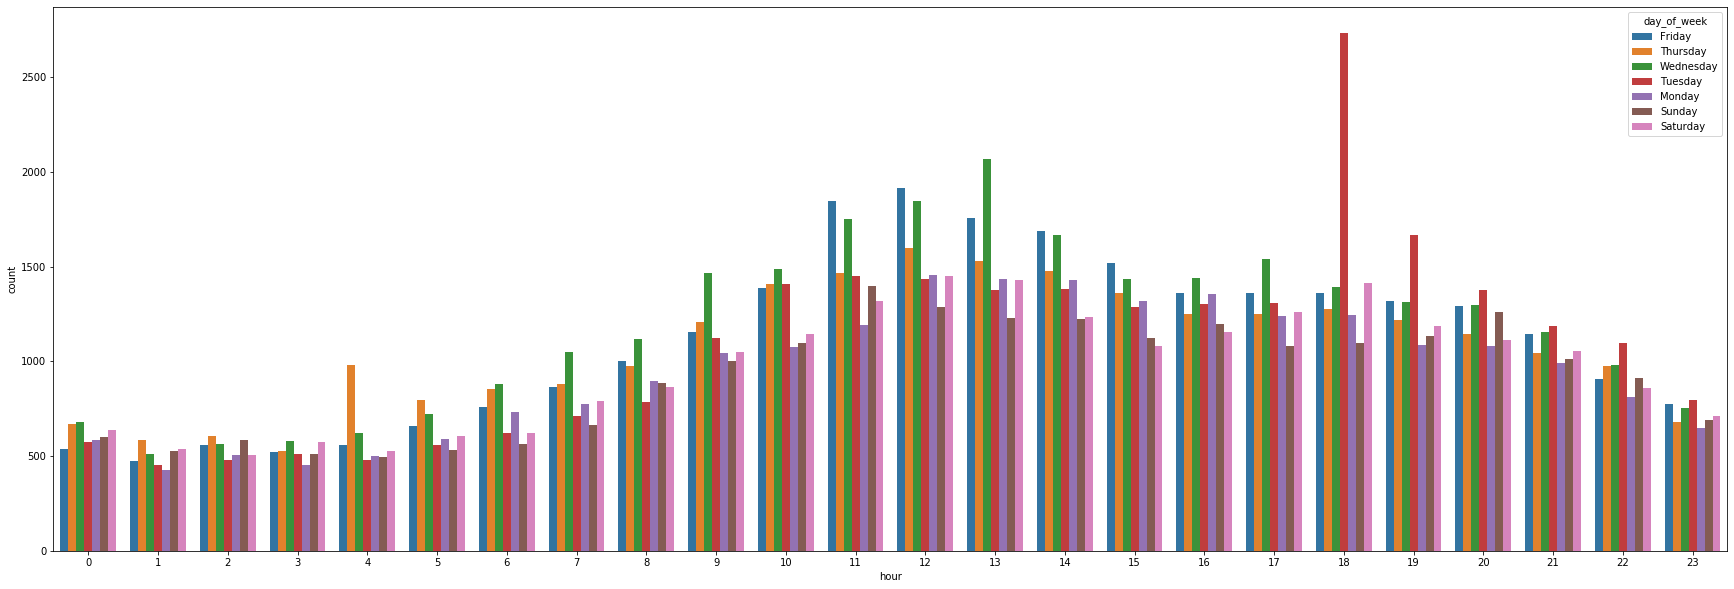

In [235]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='hour', hue="day_of_week", data=df)

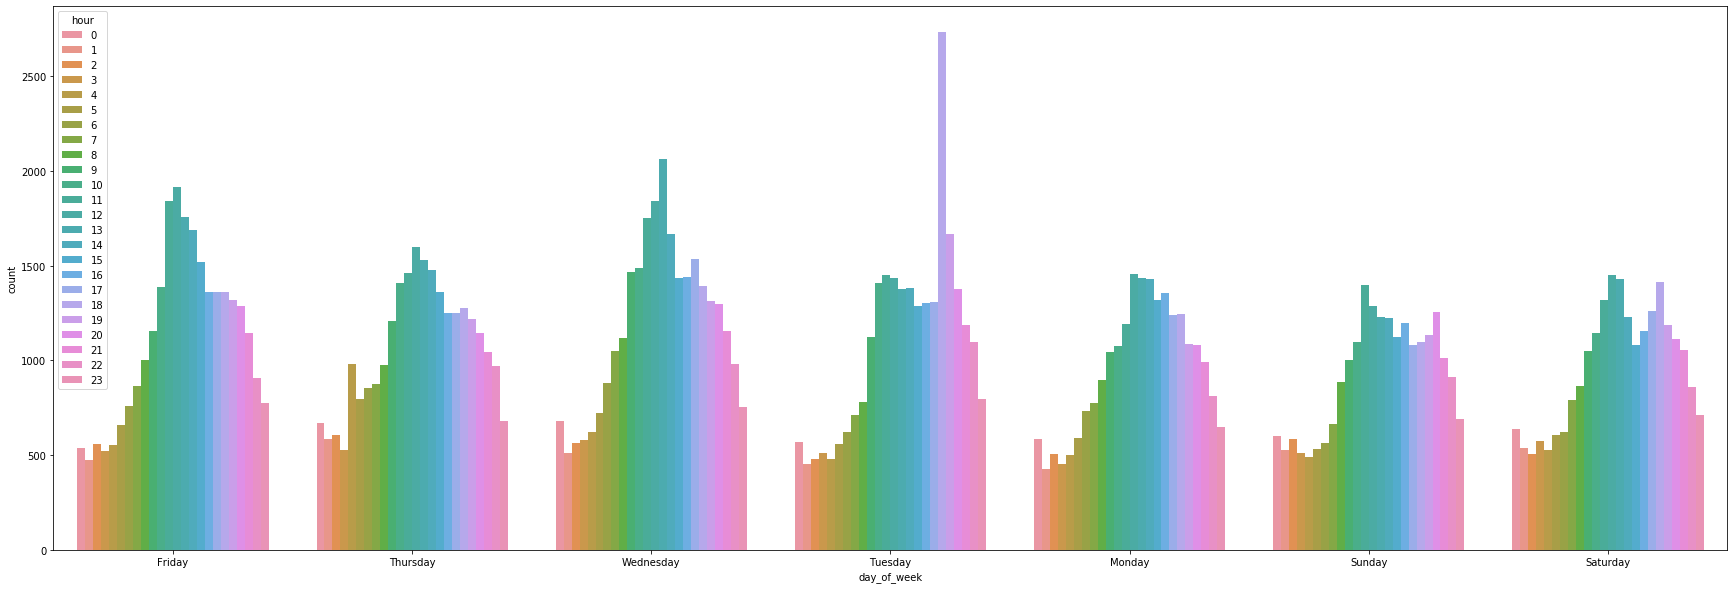

In [236]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day_of_week', hue="hour", data=df)

In [256]:
df.groupby('day_of_week')[['hour']].mean()

,hour
day_of_week,
Friday,12.956725
Monday,12.895565
Saturday,12.840394
Sunday,12.887040
Thursday,12.455198
Tuesday,13.616251
Wednesday,12.732860


In [268]:
df.groupby('date')[['hour']].mean()

,hour
date,
2020-11-17,18.269637
2020-11-18,12.764549
2020-11-19,12.518143
2020-11-20,13.342161
2020-11-21,13.476435
2020-11-22,13.005774
2020-11-23,11.803258
2020-11-24,12.781283
2020-11-25,12.203421


### 2. Deep Into User Name

In [230]:
df['username'].value_counts().head(10)

uber_support       7504
lisasto81223153    1626
uberuksupport       756
mpleading           356
_fubareats_         332
ubereats            298
angela_chan_nyc     222
bemtna              177
dealsheaven4u       160
catfish_hox         148
Name: username, dtype: int64

In [231]:
df['name'].value_counts().head(10)

Uber Support                                 7506
Lisa stone                                   1626
Uber UK Support                               756
Merc                                          356
.                                             333
FubarEats - Uber & UberEats awful service     332
Uber Eats                                     298
ً                                             224
Angela Chan                                   222
Cole Yock                                     177
Name: name, dtype: int64

### 3. Deep Into Tweets